
<h1 style="color:DodgerBlue;" ><u>COMPTE RENDU TP1</u></h1>



 <u><h2>Objectif:</u></h2> 
>  *    Maitriser les trois méthodes {point fixe, dichotomie et Newton} de trouver x tel que f(x)=0.  
   *    avoir la différence entre les trois méthodes.  
   *    Programmer les solutions en Python.    

   

  ## Exercice 1 :
 ### 1.1/ 
 
 > On utilise comme outil de calcule mathématique Octave pour montrer que les deux fonctions f(x) et p(x) donnent des              résultats différents  dans l’intervalle [0.998, 1.002].
    

    



In [1]:
function x = horner(a,z_0)
n = length(a);
result = a(1);
for j = 2:n
    result = result*z_0 + a(j);
endfor
x = result;
end


In [2]:
p=@(x) (x-1).^6
f=@(x) x.^6 - 6*x.^5 + 15*x.^4 - 20*x.^3 + 15*x.^2 - 6*x + 1

p =

@(x) (x - 1) .^ 6

f =

@(x) x .^ 6 - 6 * x .^ 5 + 15 * x .^ 4 - 20 * x .^ 3 + 15 * x .^ 2 - 6 * x + 1



In [3]:
T=[1 -6 15 -20 15 -6 1]
% Expression réduite
disp('-------p(i)---------')
for i=[0.998:0.001:1.002]
p(i)
endfor
%expression developpée
disp('-------f(i)----------')
for i=[0.998:0.001:1.002]
f(i)
endfor
disp('-------horner--------')
for i=[0.998:0.001:1.002]
horner(T,i)
endfor

T =

    1   -6   15  -20   15   -6    1

-------p(i)---------
ans =    6.4000e-17
ans =    1.0000e-18
ans = 0
ans =    1.0000e-18
ans =    6.4000e-17
-------f(i)----------
ans =    1.7764e-15
ans = 0
ans = 0
ans =    8.8818e-16
ans =   -1.7764e-15
-------horner--------
ans =   -1.3323e-15
ans =   -2.2204e-15
ans = 0
ans =   -6.6613e-16
ans =   -6.6613e-16


### 1.1/ 
  > A travers la commande "plot", on trace les deux fonctions dans un même repère : f(x) en rouge et p(x) en bleu. 
   On remarque la différence au niveau graphique, cette différence est à cause de la répétition de l'arrondi chaque                itération.


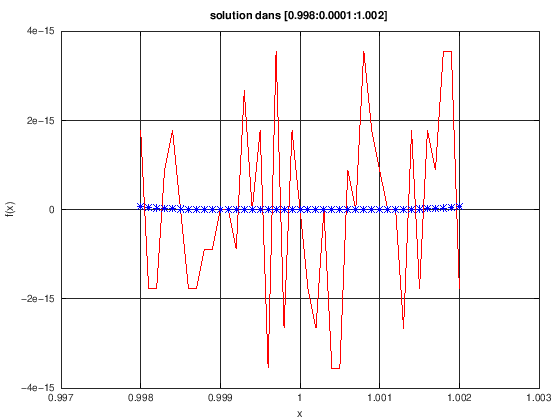

In [4]:
x=[0.998:0.0001:1.002];
plot(x,f(x),'r',x,p(x),'b*')
title (" f([0.998:0.0001:1.002]) ");
xlabel ("x");
ylabel ("f(x)");
grid on;



  ## Exercice 2 :
 ### 2.1/ 
        Apres l’implémentation du bibliothèque du langage Python " Matplotlib "  qui sert à tracer les fonctions, nous dessinons la courbe de f(x) dans l’intervalle [-2, 2].



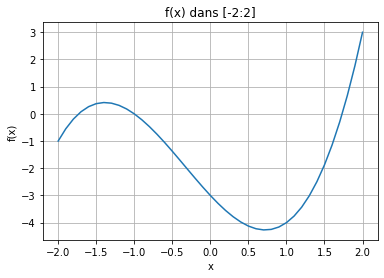

In [1]:
import matplotlib.pyplot as plt
from numpy import linspace 
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("f(x) dans [-2:2]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.plot(T,f(T))

>D'après ce graphe on constate que la fonction f coupe l'axe des abscisses en trois points, alors les intervalles correspond avec la méthode de bissection sont :  
  *   ]-2.0;-1.5[    
  *   ]-1.5;0.5[     
  *   ]1.5;2.0[   
  > <u><h3>Rappel</h3></u>
  <u>La méthode de bissection:</u> C’est un algorithme de recherche d'un zéro d’une fonction ( solution de l’équation f(x)=0) qui consiste à répéter des divisions d’un intervalle en deux sous-intervalles puis à sélectionner le où lequel existe un zéro.
  
   <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/220px-Bisection_method.svg.png"  title = "Principe de Dicothomie" >




 
 ### 2.2/ 


In [6]:
  def dicho(k, a, b, esp):
    m = (a + b) / 2

    err = abs(b - a)
    while err > esp:
        if k(m) == 0:
            break

        elif k(a) * k(b) < 0:
            b = m
        else:
            a = m
        m = (a + b) / 2
        err = abs(b - a)
    return m



  

In [11]:
x1=dicho(f,-2,-1.5,0.001)
x2=dicho(f,-1.5,0.5,0.001)
x3=dicho(f,1.5,2.0,0.001)
print(x1,x2,x3)

-1.75048828125 -1.0 1.62451171875


In [15]:
 def dichow(k, a, b, esp):
    m = (a + b) / 2
    n=0
    err = abs(b - a)
    while err > esp:
        n+=1
        if k(m) == 0:
            break

        elif k(a) * k(b) < 0:
            b = m
        else:
            a = m
        m = (a + b) / 2
        err = abs(b - a)
    return print('le point=', m,'et le nbr itération=' , n)
x1=dichow(f,-2,-1.5,0.001)
x2=dichow(f,-1.5,0.5,0.001)
x3=dichow(f,1.5,2.0,0.001)


le point= -1.75048828125 et le nbr itération= 9
le point= -1.0 et le nbr itération= 2
le point= 1.62451171875 et le nbr itération= 9



  ## Exercice 3 :
 ### 3.1/ 
> On déssine la fonction f dans l'intervalle [1,2] puis on estime graphiquement avec un erreur de 0.001 le zéro de f puisque f est strictement croissante alors il existe une seule solution:
  

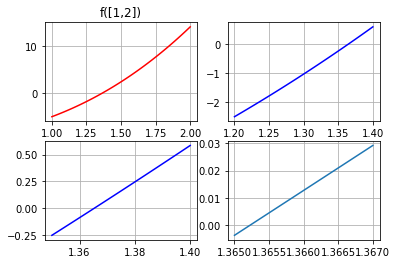

In [4]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
plt.title('f([1,2])')
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'b')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'b')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t))
plt.grid(True)


### 3.2/ 
    
    